In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
f_sample = 400
T = 20

In [131]:
#data = np.load('data.npy')
time = np.linspace(0,T-1/f_sample,T*f_sample)
time_1 = np.linspace(0,T/2-1/f_sample,T*f_sample/2)
time_2 = np.linspace(T/2,T-1/f_sample,T*f_sample/2)
data_1 = 2 * np.sin(2*np.pi*time_1*1)+10
data_2 = 4 * np.sin(2*np.pi*time_2*1)+10

C:\Users\Lorenzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lorenzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [132]:
data = np.empty(0)
data = np.append(data,[data_1, data_2])

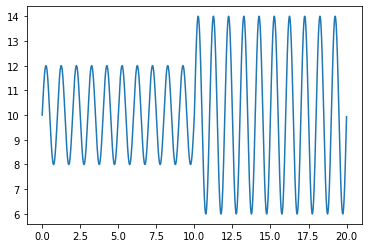

In [133]:
plt.plot(time,data)

In [134]:
signal = data
nsec = 1
overlap = 0
sampling_freq = 400
confidence = 99

In [135]:
ent_stdv = np.std(signal)
ent_mean = np.mean(signal)

In [136]:
ent_stdv

2.23606797749979

In [137]:
ent_mean

10.0

In [138]:
coeff = [1.645, 1.96, 2.326, 2.576]
conf = [90,95,98,99]
sigma = coeff[conf.index(confidence)]

In [139]:
sigma

2.576

In [140]:
w_point = int(sampling_freq * nsec) # Number of point for each window
lap = int(w_point * overlap)        # Number of point overlapped
L = len(signal)                     # length of the signal
dist = w_point - lap                # Number of point for each compartment
cmp = int(np.floor(L/(dist)))       # Number of compartment

In [141]:
w_point

400

In [142]:
stdv = np.empty(cmp)
cls = np.empty((cmp,dist))

In [143]:
for i in range(0,cmp):
    cls[i] = signal[i*dist:i*dist+dist]
    stdv[i] = np.std(cls[i])
        
if L % dist != 0:
    res_cmp = signal[cmp*dist+1:]
    stdv = np.append(stdv, np.std(res_cmp))
else:
    pass

In [144]:
## Definition of boundaries
boundUP = ent_stdv + np.std(stdv)
boundDW = ent_stdv - np.std(stdv)

In [145]:
run = np.empty(0)
ones = np.empty(0)
zeros = np.empty(0)

for i in range(0,stdv.shape[0]):
    if stdv[i] > boundUP or stdv[i] < boundDW:
        run = np.append(run,1)
    else:
        run = np.append(run,0)

In [146]:
run

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [147]:
       
for i in range(0,run.shape[0]):
    if run[i] == 1.:
        ones = np.append(ones, run[i])
    else:
        zeros = np.append(zeros, run[i])
        
N1 = ones.shape[0]
N0 = zeros.shape[0]
Nr = 0
N = N1 + N0

for i in range(1,run.shape[0]):
    if run[i] != run[i-1]:
        Nr += 1
    else:
        continue

## Definition of expected runs and of the variance of their distribution 
mean_val = (2 * N1 * N0) / N + 1
var = (2 * N1 * N0 * (2 * N1 * N0 - N)) / (N**2 * (N - 1))

## Definition of limits
lim_up = mean_val + sigma * np.sqrt(var)
lim_dw = mean_val - sigma * np.sqrt(var)

ind_up = np.round(100 * lim_up / mean_val, 3)
ind_dw = np.round(100 * lim_dw / mean_val, 3)


## True == Stationary & False == Non-stationary
if Nr >= lim_dw and Nr <= lim_up:
    bns = True
else:
    bns = False
## Index of non-stationary
index = 100 * Nr / mean_val 
if index > 100:
    index = 100
else:
    index = np.round(index,2)
    
nnst = {'index': index, 'bns':bns, 'ind_dw':ind_dw, 'ind_up':ind_up}

In [148]:
nnst

{'index': 9.09, 'bns': False, 'ind_dw': 49.032, 'ind_up': 150.968}

In [149]:
Nr

1

In [150]:
lim_up

16.60648046085017

In [151]:
lim_dw

5.39351953914983

In [152]:
100 * lim_dw / mean_val

49.031995810453004

In [153]:
mean_val

11.0